In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data and removing the first 69 rows that are garbage
data = pd.read_csv('polish_bankruptcy_5year.csv').iloc[69:]

# Resetting the index to start at 0
data.reset_index(drop=True, inplace=True)

# Load feature labels and definitions into a DataFrame
featureLabels = pd.read_csv('feature_labels.csv')
featureLabels = featureLabels.append({'Feature':'Target',
                                      'Definition':'Bankrupt (Yes/No)'}, ignore_index=True)

# Change the column names of dataframe to the keys of the featureLabels dictionary
featureLabelsDict = featureLabels.set_index('Feature').T.to_dict('list')
columnMapping = zip(list(data.columns),list(featureLabelsDict.keys()))
columnMappingDict = dict(columnMapping)
data.rename(columns=columnMappingDict, inplace=True)

# Show relavant statistics
data = data.replace(to_replace='?',value=np.nan)
data = data.astype(np.float64)
allStats = data.describe(include='all')
print(allStats)

                X1           X2           X3           X4            X5  \
count  5907.000000  5907.000000  5907.000000  5889.000000  5.899000e+03   
mean     -0.022347     0.465086     0.189155     4.892476  1.940676e+01   
std       6.163655     5.751283     1.177729    91.434574  2.152932e+04   
min    -463.890000  -430.870000   -72.067000    -0.403110 -1.076400e+06   
25%       0.003965     0.255355     0.043953     1.093700 -4.383650e+01   
50%       0.046670     0.451750     0.219440     1.651700  4.914900e-01   
75%       0.117050     0.661635     0.418430     2.931000  4.876500e+01   
max      87.459000    72.416000    28.336000  6845.800000  1.250100e+06   

                X6           X7           X8           X9          X10  \
count  5907.000000  5907.000000  5892.000000  5909.000000  5907.000000   
mean      0.022584    -0.111951     5.737741     1.588322     0.545580   
std       9.992080     9.057135   102.355101     1.548390     5.763742   
min    -463.890000  -517.480

In [2]:
# Show relevant statistics with outliers removed
dataNoOutlier = data[(data >= data.mean()-2*data.std()) & (data <= data.mean()+2*data.std())]
allStatsNoOutlier = dataNoOutlier.describe(include='all')
print(allStatsNoOutlier)

                X1           X2           X3           X4            X5  \
count  5904.000000  5903.000000  5872.000000  5880.000000   5896.000000   
mean      0.046830     0.513984     0.220236     3.061789      1.739055   
std       0.288813     0.487663     0.325710     6.981806   1134.005473   
min     -10.292000     0.000000    -2.082300    -0.403110 -41656.000000   
25%       0.003970     0.255355     0.046839     1.093250    -43.777000   
50%       0.046692     0.451690     0.221585     1.651050      0.491840   
75%       0.117045     0.661290     0.419805     2.919500     48.749500   
max       5.530000     8.552500     1.385400   181.970000  34259.000000   

                X6           X7           X8           X9          X10  \
count  5895.000000  5904.000000  5880.000000  5780.000000  5900.000000   
mean     -0.007960     0.059649     3.081248     1.449959     0.466708   
std       0.531797     0.297656     9.070647     0.777144     0.491963   
min     -17.955000   -10.292

In [3]:
# Assign a correlation matrix
corrMatrix = data.corr()

# Create DataFrame of strong correlations (negative and positive) based on correlation threshold
strongCorrMatrix = corrMatrix.unstack().reset_index()
strongCorrMatrix.rename(columns={'level_0':'Pair1',
                                 'level_1':'Pair2',0:'Correlation'}, inplace=True)
corrThresh = 0.95
strongCorrMatrix = strongCorrMatrix[((strongCorrMatrix['Correlation'] >= corrThresh) |
        (strongCorrMatrix['Correlation'] <= -corrThresh)) &
        (strongCorrMatrix['Pair1'] != strongCorrMatrix['Pair2'])]
strongCorrMatrix.reset_index(drop=True, inplace=True)

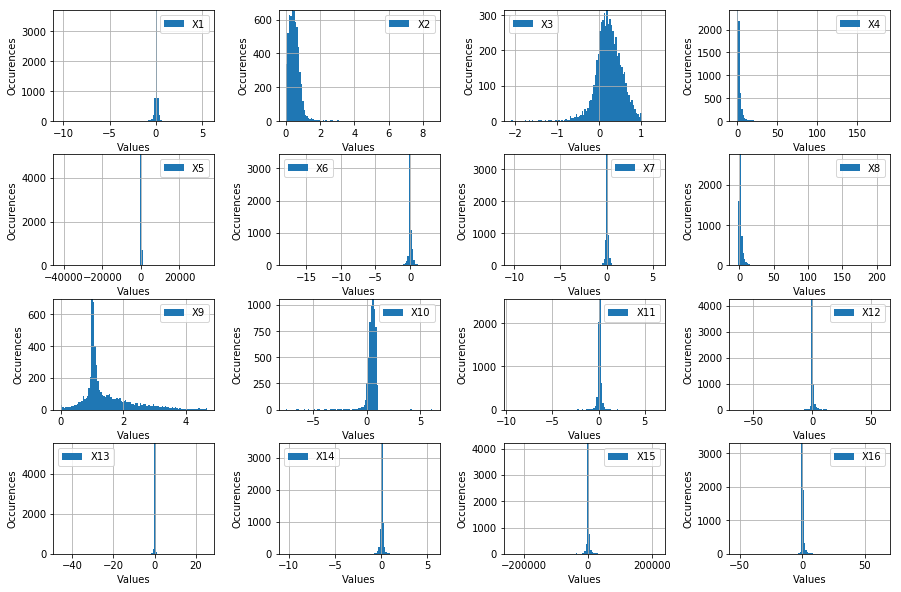

In [4]:
# Create histograms of data
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
for index in range(0,16):
    plt.subplot(4,4,index+1)
    dataNoOutlier.iloc[:,index].hist(bins=100)
    plt.xlabel('Values')
    plt.ylabel('Occurences')
    plt.ylim(top=dataNoOutlier.iloc[:,index].value_counts(bins=100).max())
    plt.legend((dataNoOutlier.columns[index],), loc=0)

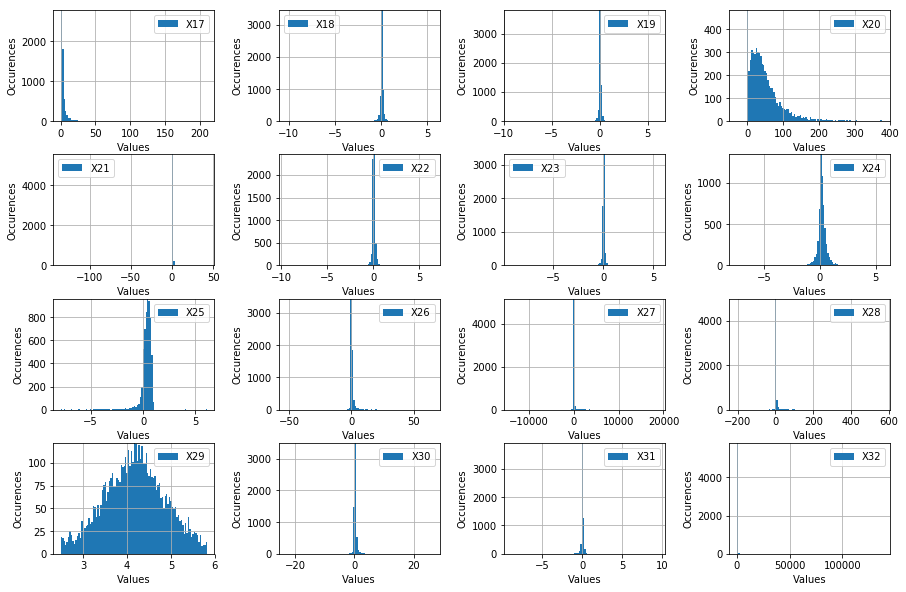

In [5]:
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
for index in range(16,32):
    plt.subplot(4,4,index-15)
    dataNoOutlier.iloc[:,index].hist(bins=100)
    plt.xlabel('Values')
    plt.ylabel('Occurences')
    plt.ylim(top=dataNoOutlier.iloc[:,index].value_counts(bins=100).max())
    plt.legend((dataNoOutlier.columns[index],), loc=0)

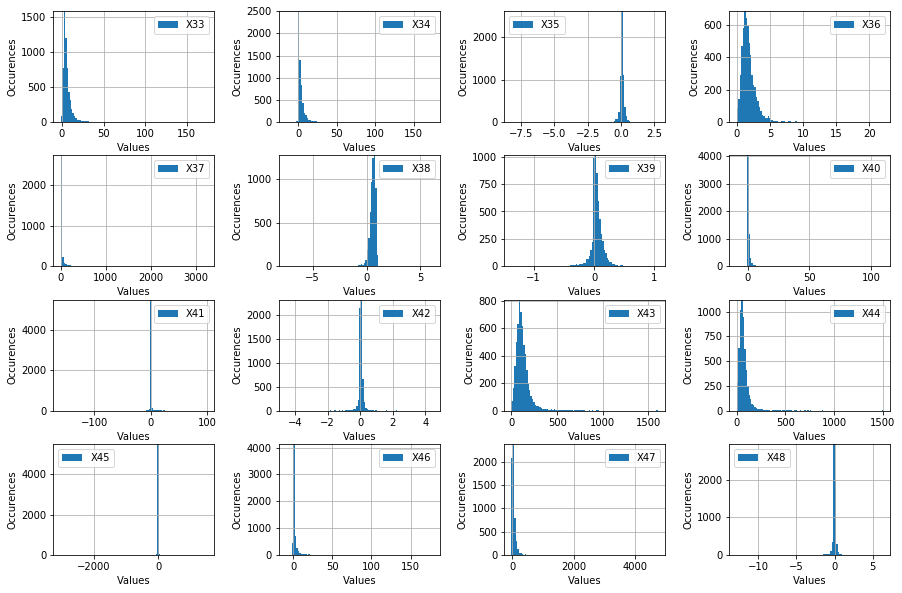

In [6]:
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
for index in range(32,48):
    plt.subplot(4,4,index-31)
    dataNoOutlier.iloc[:,index].hist(bins=100)
    plt.xlabel('Values')
    plt.ylabel('Occurences')
    plt.ylim(top=dataNoOutlier.iloc[:,index].value_counts(bins=100).max())
    plt.legend((dataNoOutlier.columns[index],), loc=0)

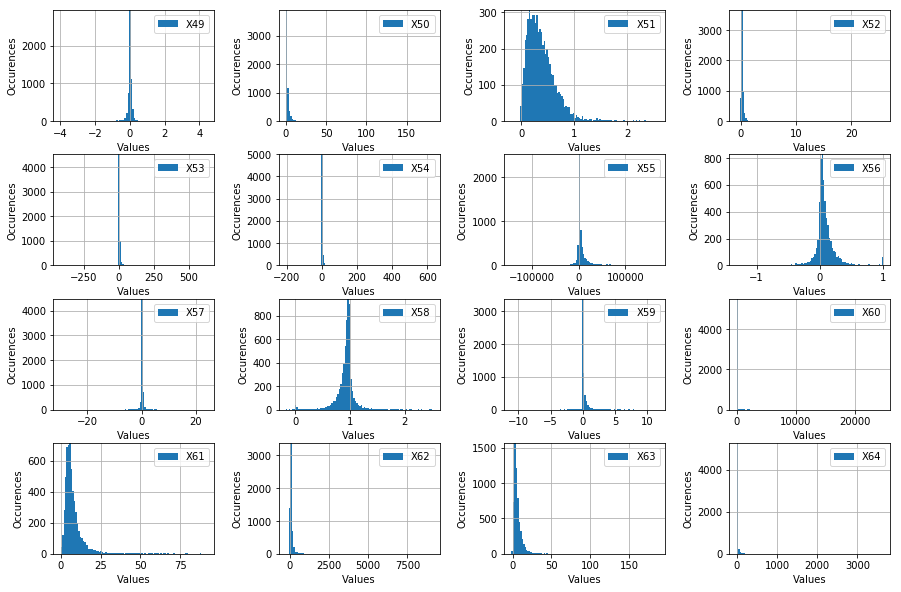

In [7]:
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
for index in range(48,64):
    plt.subplot(4,4,index-47)
    dataNoOutlier.iloc[:,index].hist(bins=100)
    plt.xlabel('Values')
    plt.ylabel('Occurences')
    plt.ylim(top=dataNoOutlier.iloc[:,index].value_counts(bins=100).max())
    plt.legend((dataNoOutlier.columns[index],), loc=0)